## Computer Vision

**_Author:_**

**Date : 08 June,2022**

### MNIST Fashion Data

**Loading Libraries**

In [1]:
import os
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [2]:
# Multiple print statments in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Adjust the Display options for number of rows and columns 
pd.set_option("display.max_columns", 500)
pd.set_option("display.min_rows", 500)

# Supress the warnings
import warnings
warnings.filterwarnings("ignore")

#### Loading Data Part

In [3]:
# Load the Fashion MNIST Dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [4]:
trainX.shape
testX.shape

(60000, 28, 28)

(10000, 28, 28)

In [5]:
trainY.shape
testY.shape

(60000,)

(10000,)

In [6]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

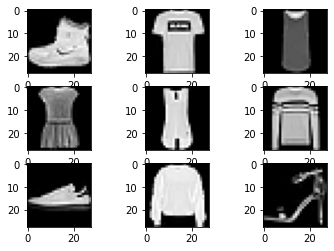

In [7]:
# Let's see a sample of images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show();

In [8]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [9]:
trainX.shape
testX.shape

(60000, 28, 28, 1)

(10000, 28, 28, 1)

In [10]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [11]:
trainY.shape
testY.shape

(60000, 10)

(10000, 10)

In [12]:
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

#### Make the Loading data part as a function

In [14]:
# load train and test dataset
def load_dataset():
    
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    return trainX, trainY, testX, testY

#### make the data prepration part as a function

In [15]:
def prep_pixels(train, test):
    
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

#### Define a Neural Network

In [16]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### Train the Model

In [17]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    
    scores, histories = list(), list()
    
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        
        # define model
        model = define_model()
        
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

#### Function for plotting the results

In [18]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        
        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        
    plt.show();

#### Function for model perfromance

In [19]:
# summarize model performance
def summarize_performance(scores):
    
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

### Run the Model

In [20]:
# load dataset
trainX, trainY, testX, testY = load_dataset()

In [21]:
# Data Prepration
trainX, testX = prep_pixels(trainX, testX)

In [22]:
# define model
model = define_model()

2022-06-09 21:18:10.322620: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
# evaluate model
scores, histories = evaluate_model(trainX, trainY)

2022-06-09 21:18:11.465405: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


> 90.650
> 91.350
> 90.875
> 90.242
> 91.050


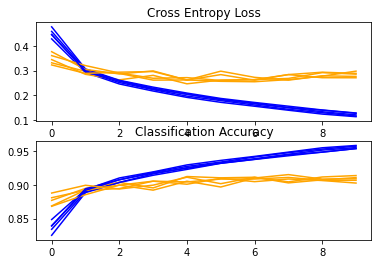

In [24]:
# learning curves
summarize_diagnostics(histories)

Accuracy: mean=90.833 std=0.374, n=5


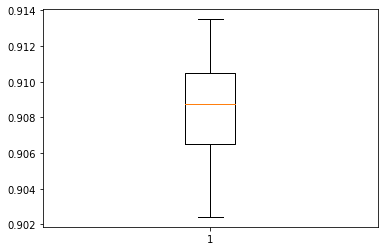

In [25]:
# summarize estimated performance
summarize_performance(scores)

In [26]:
# save model
model.save('final_model.h5')

In [29]:
from keras.models import load_model

# load model
model = load_model('final_model.h5')